In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
sns.set_theme(font_scale=1,palette='dark')
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(10,8)
plt.rcParams['figure.facecolor']= 'white'

In [4]:
wh2022=pd.read_csv(r'C:\Users\wjaku\Downloads\wh\2022.csv')
wh2021=pd.read_csv(r'C:\Users\wjaku\Downloads\wh\2021.csv')

In [5]:
wh2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   RANK                                        147 non-null    int64 
 1   Country                                     147 non-null    object
 2   Happiness score                             146 non-null    object
 3   Whisker-high                                146 non-null    object
 4   Whisker-low                                 146 non-null    object
 5   Dystopia (1.83) + residual                  146 non-null    object
 6   Explained by: GDP per capita                146 non-null    object
 7   Explained by: Social support                146 non-null    object
 8   Explained by: Healthy life expectancy       146 non-null    object
 9   Explained by: Freedom to make life choices  146 non-null    object
 10  Explained by: Generosity  

In [6]:
wh2021.head(1)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.78,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253


In [7]:
wh2022.drop(['RANK'], inplace=True, axis=1)

In [8]:
wh2022.head(1)

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"


In [9]:
wh2022=wh2022.rename(columns= {'Explained by: GDP per capita': 'GDP per capita', 'Explained by: Social support':
                               'Social support','Explained by: Healthy life expectancy':'Healthy life expectancy',
                              'Explained by: Freedom to make life choices':'Freedom to make life choices',
                              'Explained by: Generosity':'Generosity','Explained by: Perceptions of corruption':
                              'Perceptions of corruption'})

In [10]:
wh2022[['Happiness score', 'Whisker-high', 'Whisker-low', 'Dystopia (1.83) + residual', 'GDP per capita', 
        'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 
        'Perceptions of corruption']]= wh2022[['Happiness score', 'Whisker-high', 'Whisker-low', 'Dystopia (1.83) + residual', 'GDP per capita', 
        'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 
        'Perceptions of corruption']].replace(',', '.', regex=True).astype(float)

In [11]:
wh2022['Country']=wh2022['Country'].astype(str).str.replace('*','', regex=True)

In [12]:
wh2021=wh2021.rename(columns= {'Country name': 'Country'})
wh2021=wh2021.rename(columns= {'Regional indicator': 'Region'})

In [13]:
df2021=wh2021[['Country', 'Region']]

In [14]:
wh2022=wh2022.merge(df2021, on='Country')

In [15]:
wh2022.head(2)

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534,Western Europe
1,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532,Western Europe


In [16]:
wh2022.isnull().sum()

Country                         0
Happiness score                 0
Whisker-high                    0
Whisker-low                     0
Dystopia (1.83) + residual      0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Region                          0
dtype: int64

In [17]:
wh2022.duplicated().sum()

0

In [18]:
wh2022['Country'].count()

143

In [19]:
wh2022['Happiness score'].mean()

5.555461538461535

In [20]:
wh2022['Happiness score'].min()

2.404

In [21]:
wh2022['Happiness score'].max()

7.821

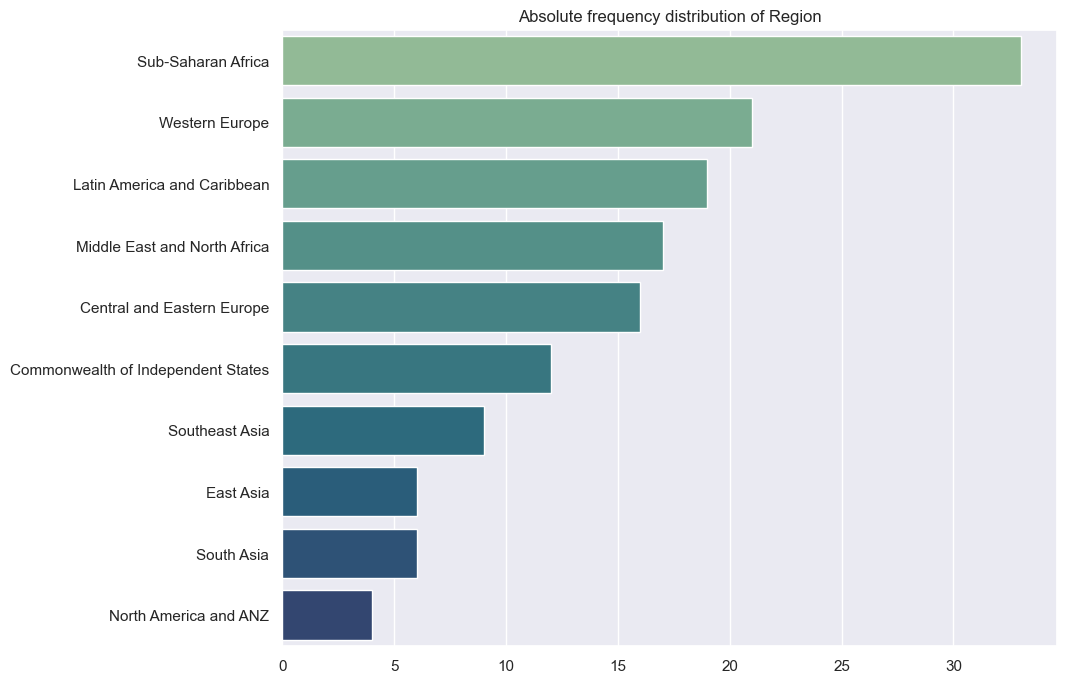

<Figure size 1400x1200 with 0 Axes>

In [22]:
frequency=wh2022.groupby('Region')['Happiness score'].count().sort_values(ascending=False)
freq=frequency.reset_index()
sns.barplot(data=freq, x=frequency.values, y='Region', palette='crest')
plt.ylabel('')
plt.title('Absolute frequency distribution of Region')
plt.figure(figsize=(14,12))
plt.show()


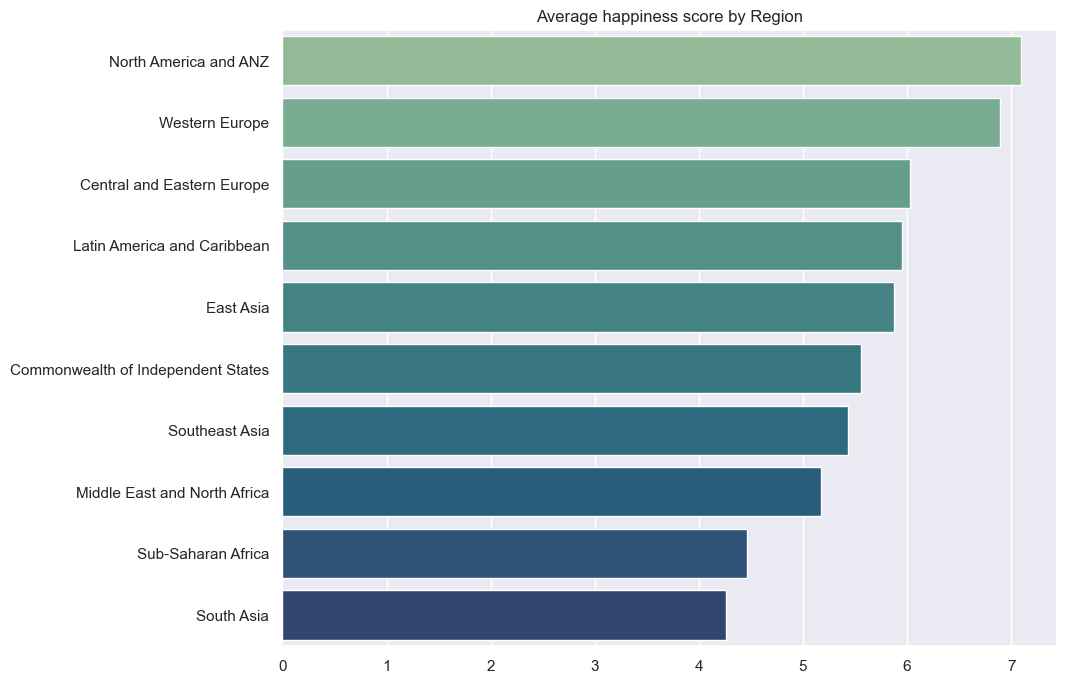

<Figure size 1400x1200 with 0 Axes>

In [23]:
reg_avg=wh2022.groupby(['Region'])['Happiness score'].mean().sort_values(ascending=False)
df=reg_avg.reset_index()
sns.barplot(data=df, x=reg_avg.values, y='Region', palette='crest')
plt.ylabel('')
plt.title('Average happiness score by Region')
plt.figure(figsize=(14,12))
plt.show()

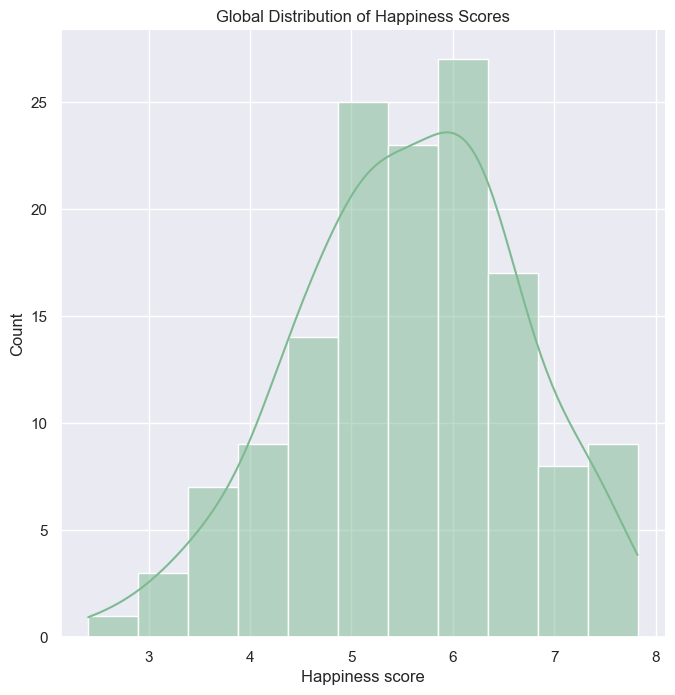

In [24]:
sns.set_palette('crest')
sns.displot(data=wh2022, x='Happiness score', kde=True, height=7)
plt.title('Global Distribution of Happiness Scores')
plt.show()

<Figure size 600x800 with 0 Axes>

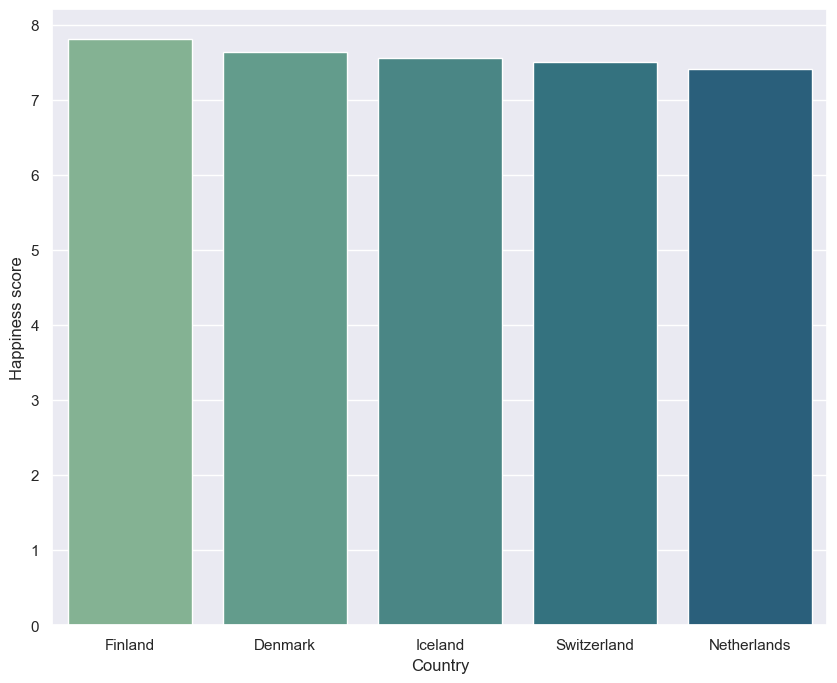

<Figure size 600x800 with 0 Axes>

In [25]:
sns.barplot(data=wh2022.head(5), x='Country', y='Happiness score')
plt.figure(figsize=(6,8))

<Axes: xlabel='Country', ylabel='Happiness score'>

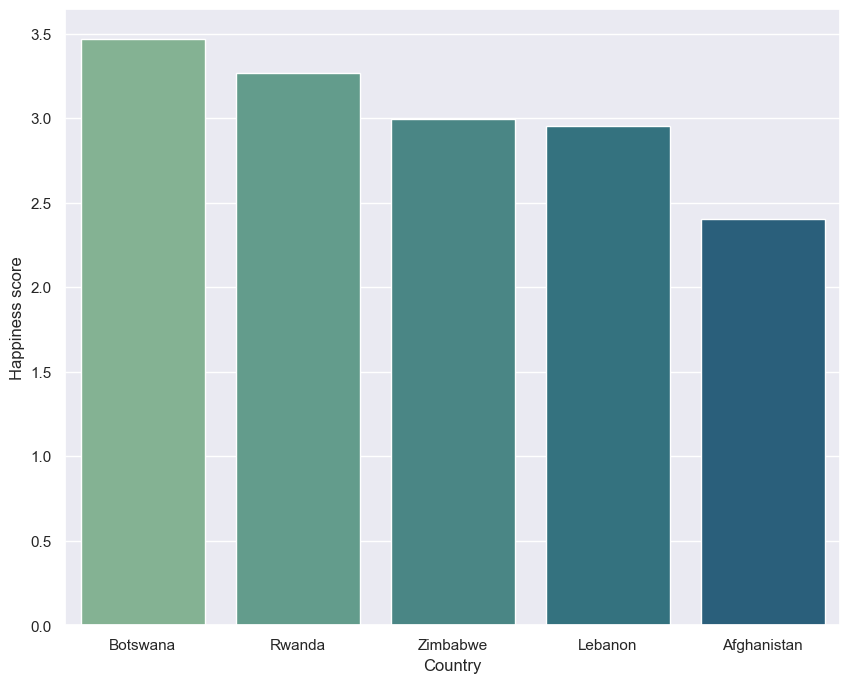

In [26]:
sns.barplot(data=wh2022.tail(5), x='Country', y='Happiness score')

In [27]:
variables = wh2022.iloc[:, [1, 5, 6, 7, 8, 9, 10]]

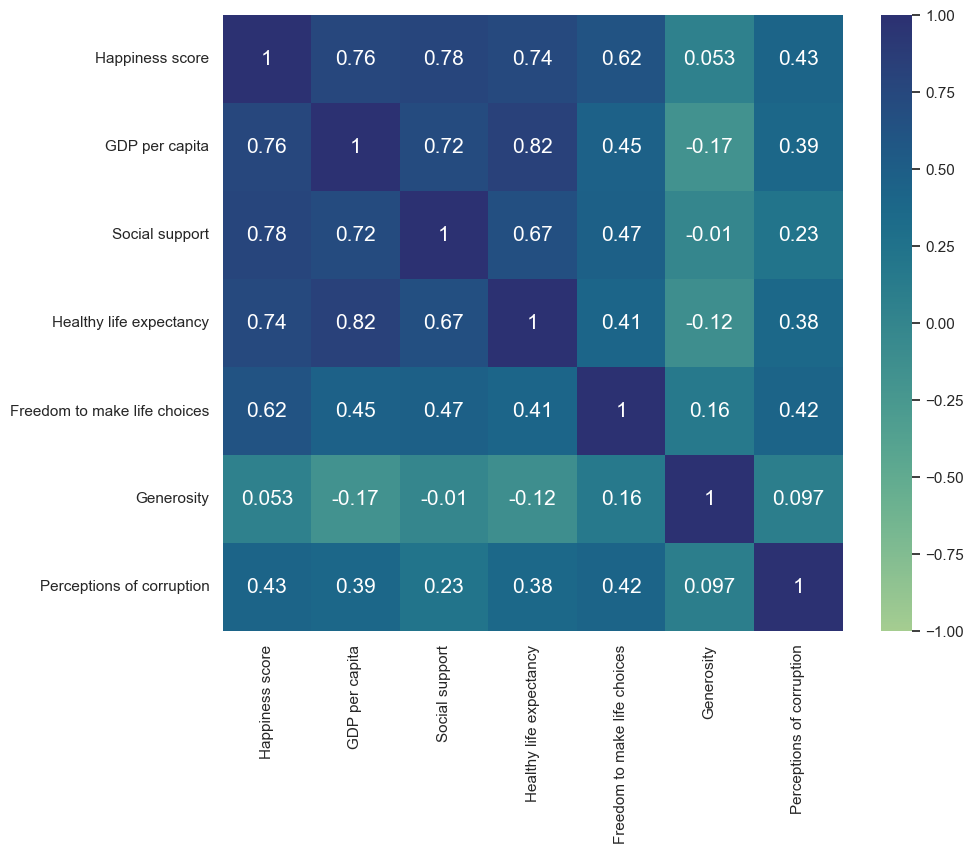

<Figure size 1600x1800 with 0 Axes>

In [28]:
sns.heatmap(variables.corr(), annot=True, vmax=1.0, vmin=-1.0, cmap='crest')
plt.figure(figsize=(16,18))
plt.show()

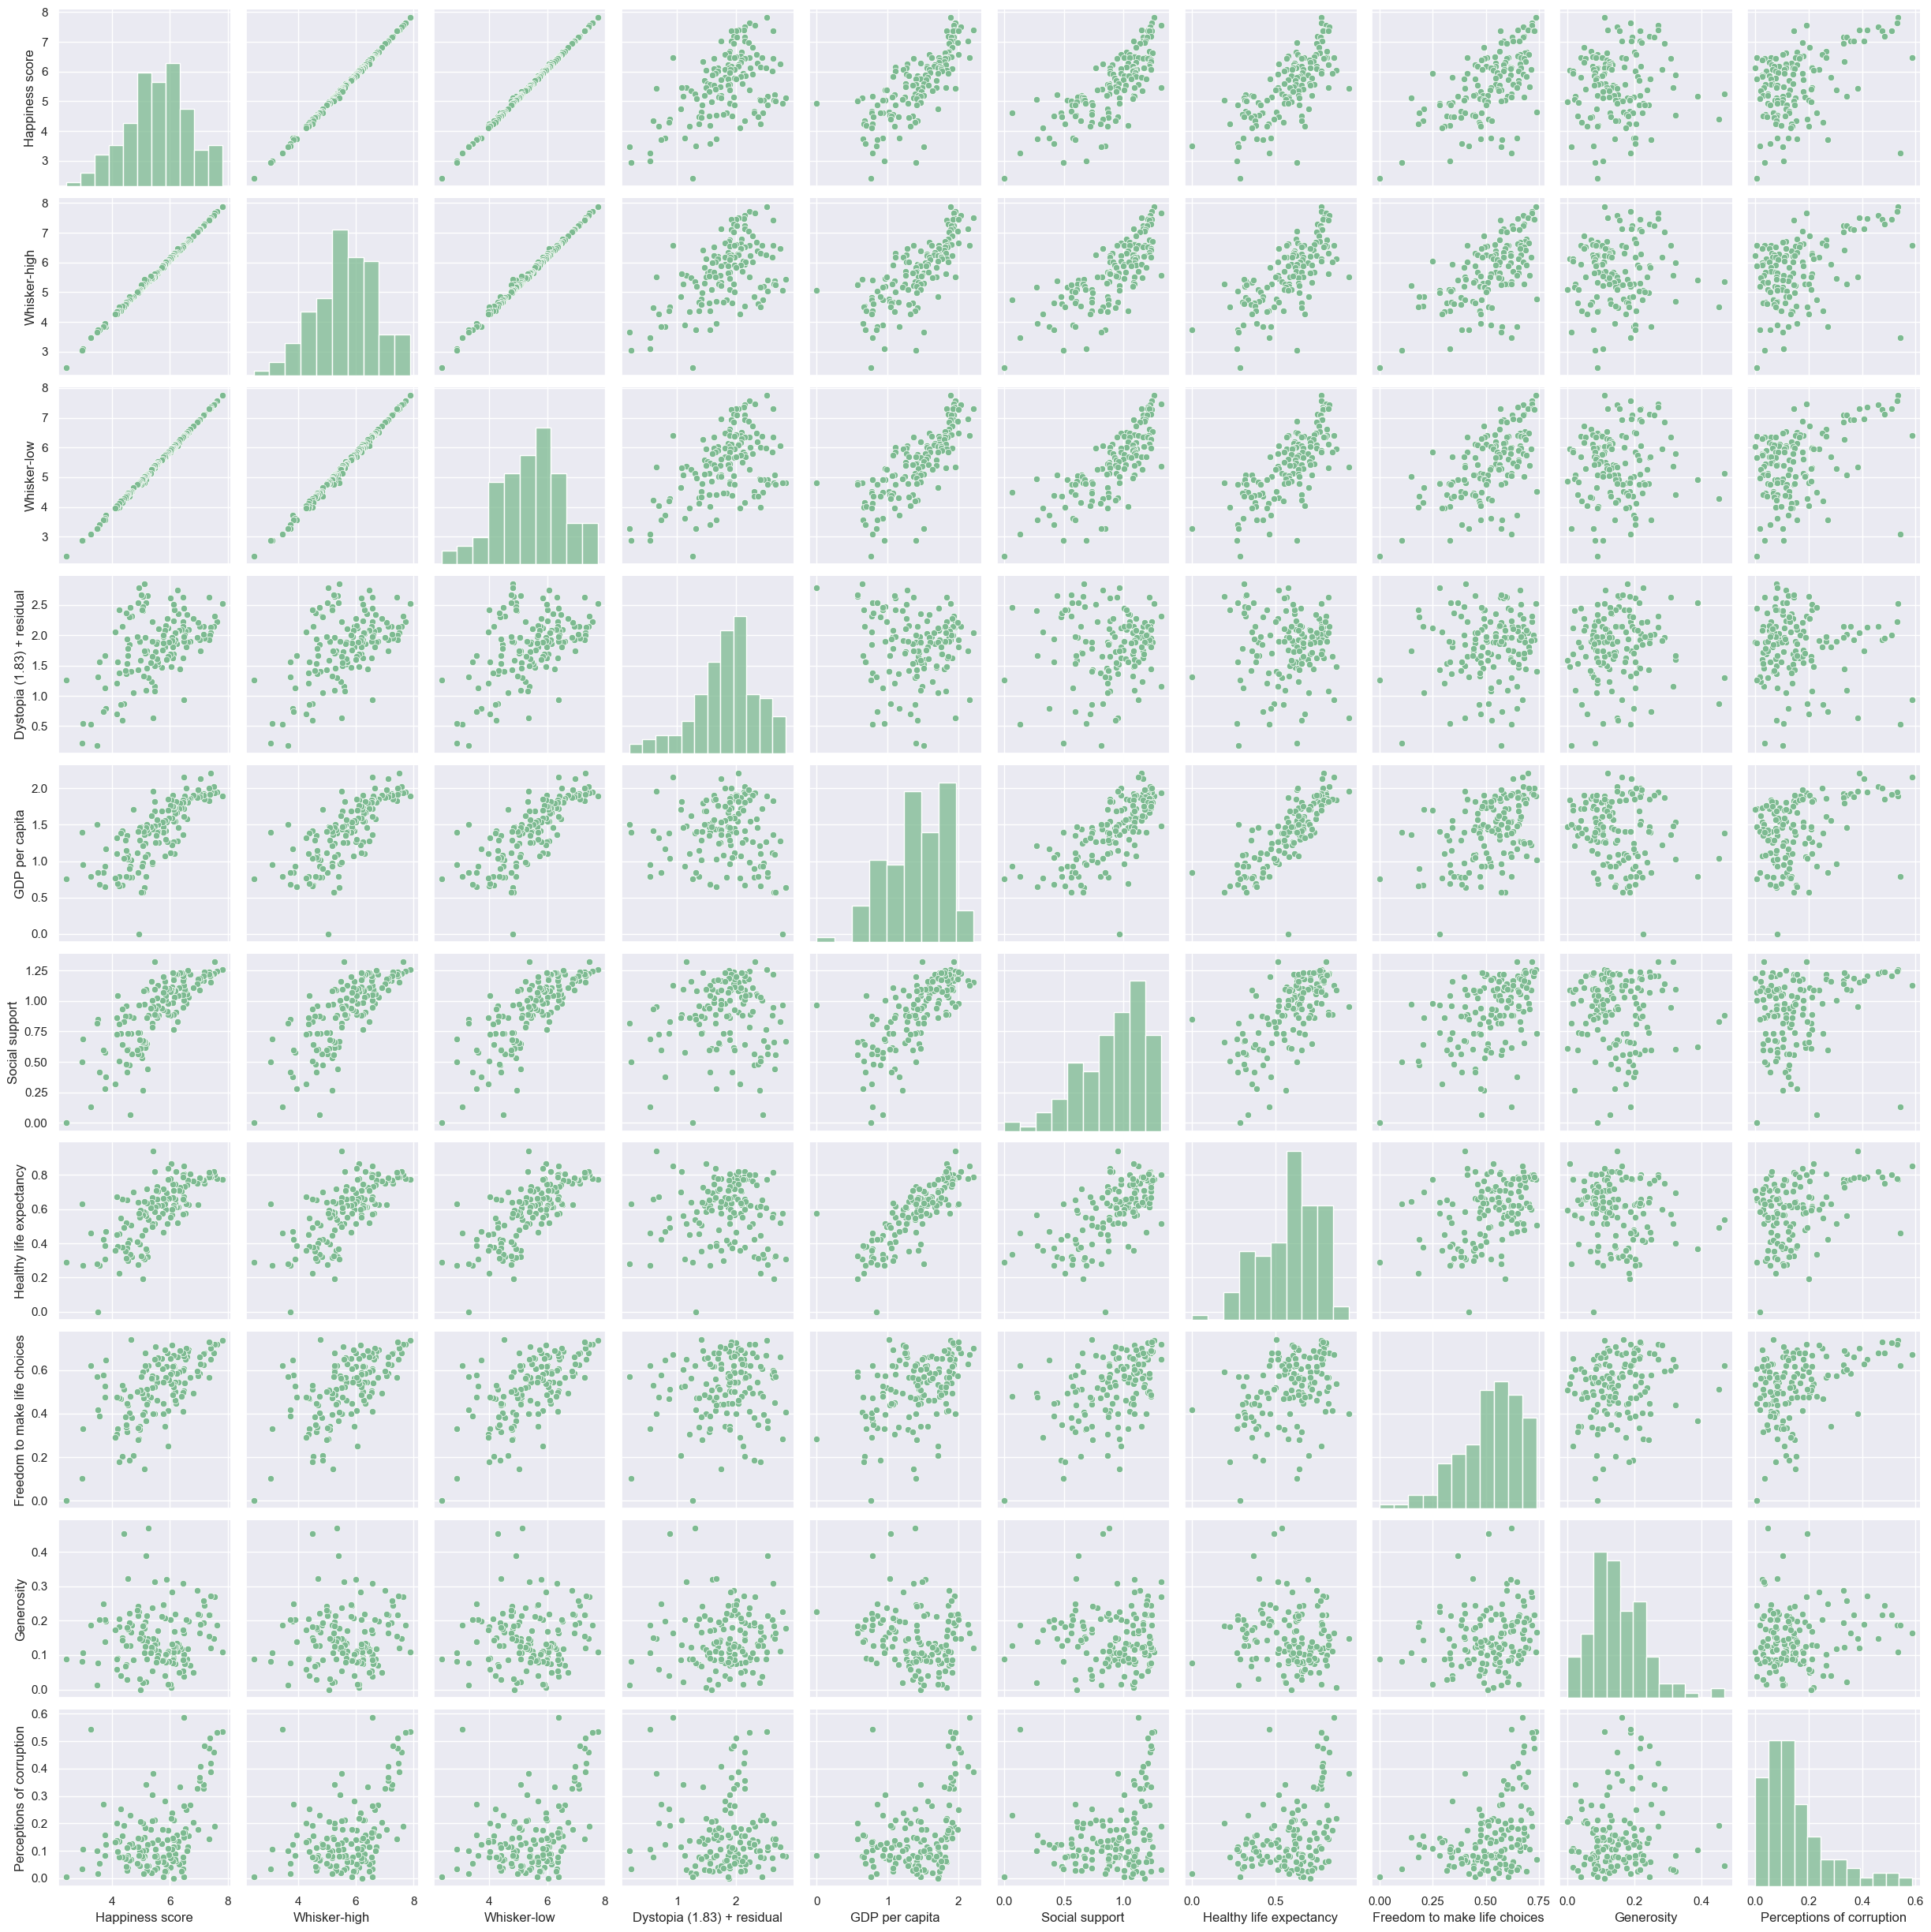

In [29]:
sns.pairplot(wh2022)

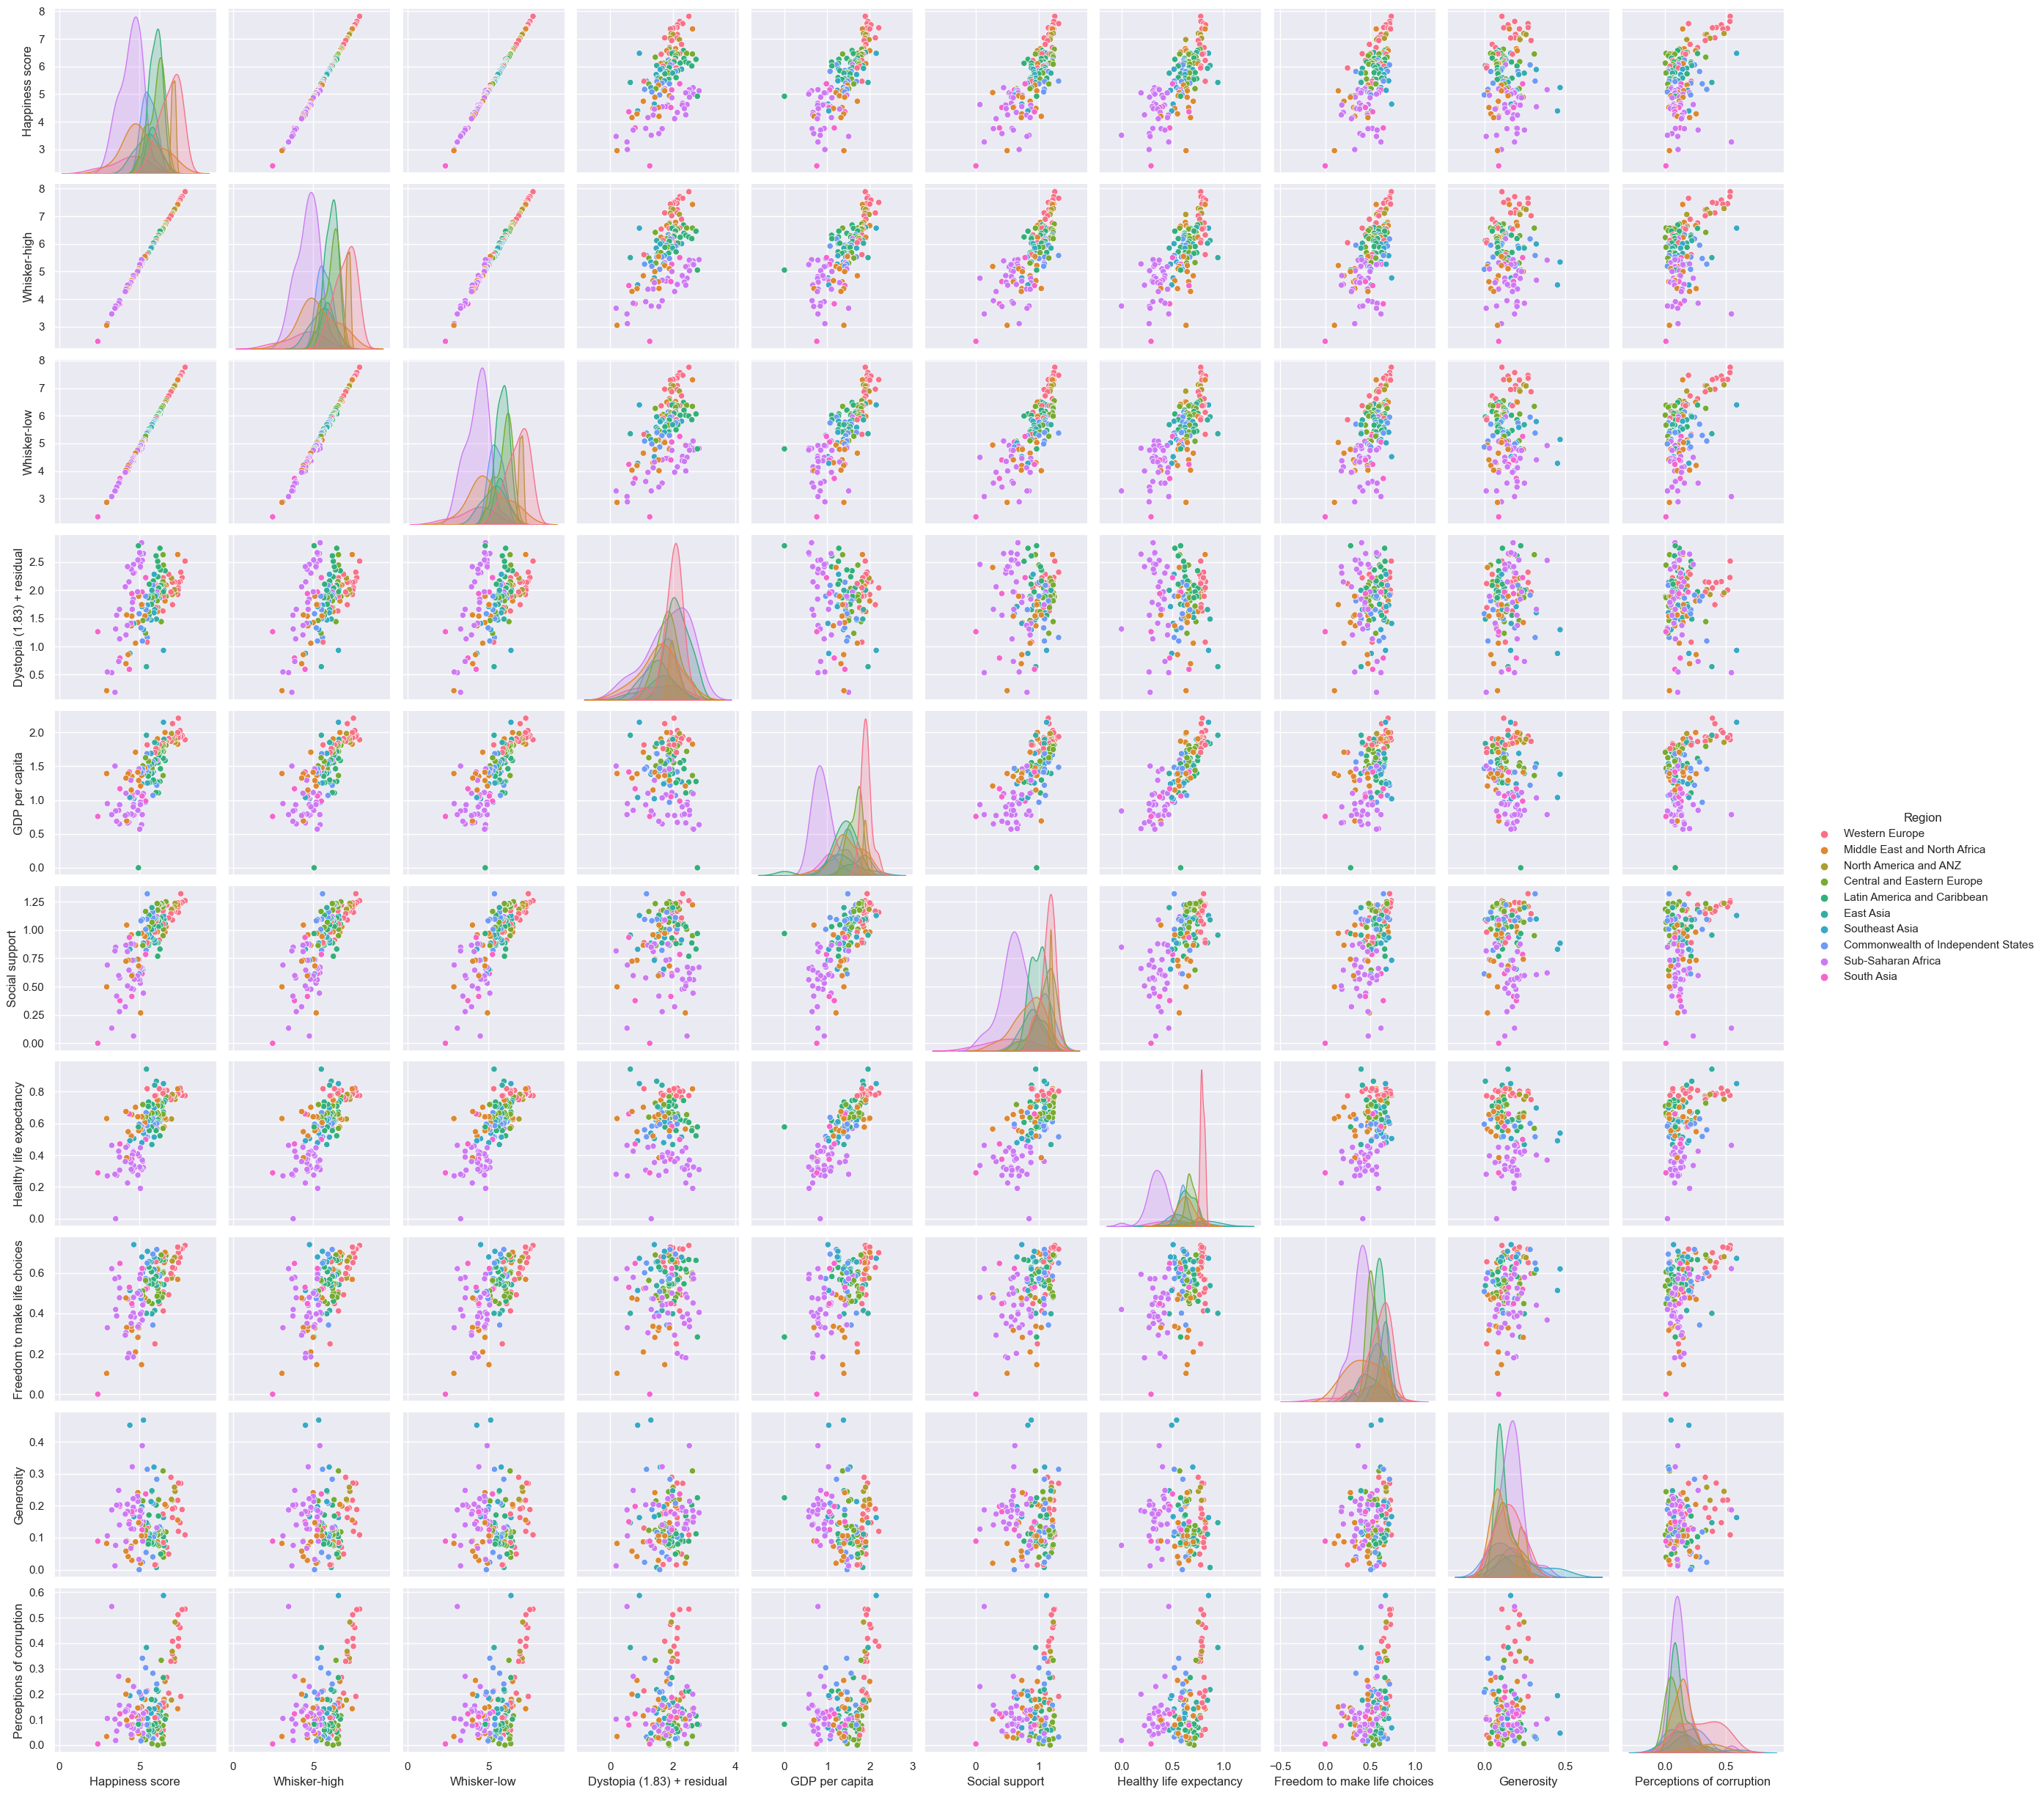

In [30]:
sns.pairplot(data=wh2022, hue='Region')